In [1]:
from pandas import read_csv 
import numpy as np

In [2]:
df = read_csv('agricultural_dataset.csv')
df.head()

,head
0,550
1,450
2,550
3,550
4,450


In [3]:
values = df.values.astype('float32')
values.shape

(319, 1)

In [4]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [6]:
scaler.inverse_transform(test).ravel()

array([1000.     , 1000.     , 1000.     , 1000.     , 1000.     ,
       1000.     , 1000.     , 1000.     , 1400.     , 1000.     ,
       1200.     , 1500.     , 1000.     , 1400.     , 1000.     ,
       1400.     , 1200.     , 1400.     , 1400.     , 1500.     ,
       1500.     , 1500.     , 1500.     , 1500.     , 1500.     ,
       1500.     , 1500.     , 1500.     , 1400.     , 1200.     ,
       1500.     ,  850.     , 1000.     , 1000.     ,  800.     ,
       3500.     , 1200.     ,  800.     ,  800.     ,  500.     ,
       1100.     , 3200.     , 3000.     , 3000.     , 3000.     ,
       3000.     , 3000.     , 3000.     , 3500.     , 1600.     ,
       1200.     ,  950.     ,  940.     ,  940.     ,  940.     ,
        930.00006,  930.00006,  850.     ,  800.     ,  800.     ,
        800.     ,  800.     ,  800.     ,  800.     ,  800.     ,
        800.     ,  800.     ,  800.     ,  800.     ,  800.     ,
        800.     ,  600.     ,  600.     ,  600.     ,  500.  

In [7]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [8]:
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(183, 30, 1)

In [10]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense

Using TensorFlow backend.


In [11]:
from keras import Sequential
NUM_NEURONS_FirstLayer = 100
NUM_NEURONS_SecondLayer = 50
EPOCHS = 200
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX,trainY,epochs=EPOCHS,shuffle=True,batch_size=1, verbose=2)
 


Epoch 1/200
 - 9s - loss: 0.0199
Epoch 2/200
 - 7s - loss: 0.0122
Epoch 3/200
 - 7s - loss: 0.0101
Epoch 4/200
 - 7s - loss: 0.0098
Epoch 5/200
 - 7s - loss: 0.0085
Epoch 6/200
 - 7s - loss: 0.0095
Epoch 7/200
 - 7s - loss: 0.0087
Epoch 8/200
 - 7s - loss: 0.0084
Epoch 9/200
 - 8s - loss: 0.0064
Epoch 10/200
 - 7s - loss: 0.0072
Epoch 11/200
 - 8s - loss: 0.0066
Epoch 12/200
 - 8s - loss: 0.0071
Epoch 13/200
 - 8s - loss: 0.0070
Epoch 14/200
 - 8s - loss: 0.0073
Epoch 15/200
 - 8s - loss: 0.0072
Epoch 16/200
 - 8s - loss: 0.0068
Epoch 17/200
 - 8s - loss: 0.0067
Epoch 18/200
 - 8s - loss: 0.0065
Epoch 19/200
 - 8s - loss: 0.0069
Epoch 20/200
 - 8s - loss: 0.0061
Epoch 21/200
 - 8s - loss: 0.0062
Epoch 22/200
 - 8s - loss: 0.0063
Epoch 23/200
 - 8s - loss: 0.0061
Epoch 24/200
 - 8s - loss: 0.0064
Epoch 25/200
 - 8s - loss: 0.0060
Epoch 26/200
 - 8s - loss: 0.0062
Epoch 27/200
 - 8s - loss: 0.0064
Epoch 28/200
 - 8s - loss: 0.0063
Epoch 29/200
 - 8s - loss: 0.0061
Epoch 30/200
 - 7s - lo

In [12]:
from sklearn.externals import joblib 

# Save the model as a pickle in a file 
joblib.dump(model, 'filename.pkl')

['filename.pkl']

In [13]:
testPredict = model.predict(testX)

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape

((76, 1), (76,))

In [14]:
scaler.inverse_transform(testPredict).ravel()

array([1697.9539 , 1078.2177 ,  684.93976,  982.5969 , 1010.36743,
       1060.5648 , 1810.9913 ,  465.53073,  828.17786,  832.02057,
        942.17053, 1154.7523 , 1709.8585 ,  299.6678 , 1508.3661 ,
       1034.1758 ,  562.57983, 1923.388  ,  798.2546 ,  731.0684 ,
       1589.5326 , 1587.9896 ,  710.092  , 1520.2108 ,  721.5253 ,
       1055.6035 ,  973.6326 , 1008.64954,  993.7171 ,  909.35345,
        859.9494 ,  832.60474,  808.2062 ,  791.45996,  817.36316,
        910.98956,  932.23096,  871.9065 ,  860.48834,  816.3932 ,
        805.8919 ,  798.79926,  791.6749 ,  728.79004,  906.39746,
        710.20886,  762.2303 ,  775.4274 ,  722.9512 ,  717.20294,
        687.93115,  733.3544 ,  757.1423 ,  842.5169 ,  861.009  ,
       1050.5894 ,  973.52057,  959.8878 , 1012.3302 ,  985.1555 ,
        974.25433, 1011.7085 , 1012.6541 , 1014.79144, 1025.816  ,
       1224.8428 ,  713.2205 , 1234.8625 ,  974.4335 , 1099.6099 ,
       1029.8335 , 1052.8885 , 1047.7135 , 1059.8151 , 1259.62

In [15]:
from matplotlib import pyplot as plt

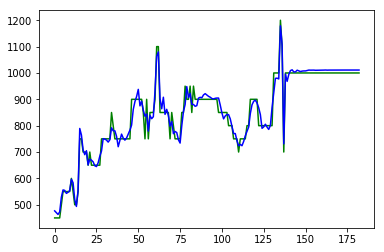

In [16]:
plt.plot(trainTrue, c = 'g')
plt.plot(trainPredict, c = 'b')
plt.show()

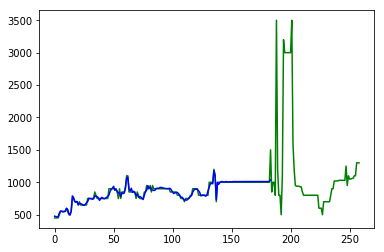

In [31]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()

In [18]:
testX.shape

(76, 30, 1)

In [19]:
testY[0]

1.375

In [20]:
testPredict = model.predict([[testX[0]]])

In [21]:
testPredict

array([[1.6224422]], dtype=float32)

In [22]:
print("Final rmse value is =",np.sqrt(np.mean((trainPredict-trainTrue)**2)))

Final rmse value is = 25.38795789463273


In [23]:
import numpy as np
testx=np.append(testX[75][1:], [[0.75]],axis = 0) 
testx

array([[0.375     ],
       [0.375     ],
       [0.375     ],
       [0.375     ],
       [0.375     ],
       [0.5       ],
       [0.625     ],
       [0.625     ],
       [0.77499998],
       [0.77499998],
       [0.77499998],
       [0.77499998],
       [0.78750002],
       [0.78750002],
       [0.78750002],
       [0.78750002],
       [0.78750002],
       [0.78750002],
       [1.0625    ],
       [0.6875    ],
       [0.875     ],
       [0.8125    ],
       [0.8125    ],
       [0.82499993],
       [0.82499993],
       [0.875     ],
       [0.875     ],
       [1.125     ],
       [1.125     ],
       [0.75      ]])

In [24]:
print(testx)

[[0.375     ]
 [0.375     ]
 [0.375     ]
 [0.375     ]
 [0.375     ]
 [0.5       ]
 [0.625     ]
 [0.625     ]
 [0.77499998]
 [0.77499998]
 [0.77499998]
 [0.77499998]
 [0.78750002]
 [0.78750002]
 [0.78750002]
 [0.78750002]
 [0.78750002]
 [0.78750002]
 [1.0625    ]
 [0.6875    ]
 [0.875     ]
 [0.8125    ]
 [0.8125    ]
 [0.82499993]
 [0.82499993]
 [0.875     ]
 [0.875     ]
 [1.125     ]
 [1.125     ]
 [0.75      ]]


In [25]:
testPredict = model.predict([[testx]])
testPredict = scaler.inverse_transform(testPredict).ravel()

In [26]:
testX

array([[[0.75     ],
        [0.75     ],
        [0.75     ],
        ...,
        [1.375    ],
        [1.25     ],
        [1.       ]],

       [[0.75     ],
        [0.75     ],
        [0.75     ],
        ...,
        [1.25     ],
        [1.       ],
        [1.375    ]],

       [[0.75     ],
        [0.75     ],
        [0.75     ],
        ...,
        [1.       ],
        [1.375    ],
        [0.5625   ]],

       ...,

       [[0.25     ],
        [0.125    ],
        [0.375    ],
        ...,
        [0.8249999],
        [0.875    ],
        [0.875    ]],

       [[0.125    ],
        [0.375    ],
        [0.375    ],
        ...,
        [0.875    ],
        [0.875    ],
        [1.125    ]],

       [[0.375    ],
        [0.375    ],
        [0.375    ],
        ...,
        [0.875    ],
        [1.125    ],
        [1.125    ]]], dtype=float32)

In [29]:
import numpy as np
start=testX[75]
testPredict=[[0.75]]
for i in range(10):
    start=np.append(start[1:], testPredict,axis = 0) 
    testPredict = model.predict([[start]])
testPredict = scaler.inverse_transform(testPredict).ravel()
s=testPredict

In [30]:
print("The next predicted price of the commodity is : ",s)

The next predicted price of the commodity is :  [1034.8545]
